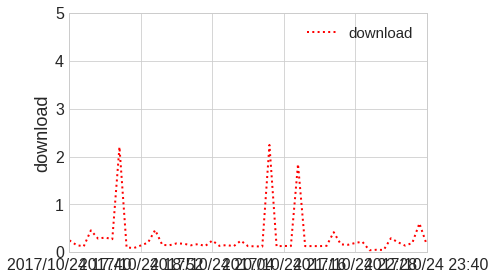

In [43]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

EXP_NAME = "inputs"
MAX_ROUNDS = 50
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')
INPUT_DIR = os.path.join( os.getcwd(), 'inputs')


##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})

def read_inputs():
    """"Reads the results for all the nodes and returns
    a list of pandas Dataframes, one for each node"""
    #Get list of nodes(files) with results
    nodes = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]
    #Load results from each node
    nodes_results = {}
    for node in nodes:
        f = os.path.join(INPUT_DIR,node)
        try:
            nodes_results[node] = pd.read_csv(f)
            nodes_results[node] = nodes_results[node].replace('None',np.nan)
        except Exception:
            print('EXception')
    return nodes_results    

def plot_var_per_round(results, var):
    """Plot the median acrros nodes of a variable"""
    median = getMedianDF(results,var)
    #Create new figure
    fig = plt.figure()
    #Print the plot
    median.plot()
    #Modify parameters
    plt.ylabel(var)
    plt.xlabel('time')
    plt.xlim(0,MAX_ROUNDS)
    plt.ylim(0,MAX_YVAL)
    #Dummy line to avoid bug of matplotlib that closes image right after plot
    #It's a readline function, just press enter
    #input('Done')
    #You can also automatically save figures
    #fig.savefig(os.path.join(GRAPHS_DIR,var.replace(' ','_')+'_per_round.png'), format='png', dpi=fig.dpi)

def plot_separately(results,variables, legend):

    # Get median time series for all varibales
    medians = [getMedianDF(results,var) for var in variables]
    #print(medians)
    i=0
    colors = ['red', 'blue']
    lbl=[]
    for median in medians:
        median.plot(label = legend[i], linewidth=2.0, linestyle=linestyles[i], color=colors[i])
        lbl.append(legend[i])
        i+=1
    plt.legend(variables)
    plt.ylabel(legend)
    plt.xlim(0,MAX_ROUNDS)
    plt.ylim(0,MAX_YVAL)
    plt.show()
    
######### Assistant functions###############

def getMedianDF(nodes_results,var):
    """"Helper function that extracts median time series of the var accross the various nodes"""
    series = []
    total=0
    count=0
    for name,r in nodes_results.items():
        #Normalize duplicate rounds
        #r['date'] = r['date'].apply(np.trunc)
        s = r.groupby('date',axis=0).mean()[var]
        total+=s.mean()
        count+=1
        s.name = name
        series.append(s)
    #try:
    df = pd.concat(series,axis=1)
    #except:
        #ipdb.set_trace()
    median = df.median(axis=1)
    median.name = var
    return median

if __name__ == '__main__':

    nodes_results = read_inputs()
    #print(nodes_results['10.139.40.85:3128']['download'])
    plot_separately(nodes_results, ['download'], 'download')
    #plot_comparative(nodes_results,'download')

In [30]:
a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
np.trunc(a)

array([-1., -1., -0.,  0.,  1.,  1.,  2.])